## Программирование в Python
### Небольшой обзор по виджетам Jupyter Notebook

*Алла Тамбовцева*

Если библиотека для виджетов не установлена, ее нужно установить:

In [ ]:
!pip install ipywidgets

Далее, как обычно, импортируем библиотеку:

In [1]:
import ipywidgets as widgets

Посмотрим на примеры запроса информации у пользователя с помощью виджетов, а также обратим внимание на то, как эту информацию сохранить для последующей обработки. 

Представим себе небольшой, немного странный опрос.

### Пример слайдера с целочисленными значениями

In [5]:
print("Оцените свою пунктуальность по шкале от Карлсона (значение 1) до Монте-Кристо (значение 10):")

# создаем слайдер и сохраняем в slider_int
# value – значение по умолчанию
# min – минимум, левая граница
# max – максимум, правая граница
# step – шаг
# description – описание, отображается рядом со слайдером

slider_int = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Вопрос 1: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# выводим его на экран

display(slider_int)

Оцените свою пунктуальность по шкале от Карлсона (значение 1) до Монте-Кристо (значение 10):


IntSlider(value=5, continuous_update=False, description='Вопрос 1: ', max=10, min=1)

In [6]:
# сохраняем выбранное значение в p и делаем с ним, что хотим

p = slider_int.value

if p > 7:
    print("Эдмон, это вы?")
else:
    print("Ничего. Карлсон тоже хоть куда!") 

Ничего. Карлсон тоже хоть куда!


### Пример слайдера с выбором интервала

In [9]:
print("Возраст спрашивать неприлично, поэтому укажите допустимый для вас интервал:")

# создаем слайдер и сохраняем в slider_range
# value – значения по умолчанию, две границы, поэтому список
# min – минимум, левая граница
# max – максимум, правая граница
# step – шаг
# description – описание, отображается рядом со слайдером

slider_range = widgets.IntRangeSlider(
    value=[20, 40],
    min=0,
    max=100,
    step=2,
    description='Возраст:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

display(slider_range) 

Возраст спрашивать неприлично, поэтому укажите допустимый для вас интервал:


IntRangeSlider(value=(20, 40), continuous_update=False, description='Возраст:', step=2)

In [11]:
# посмотрим на значения – это кортеж
slider_range.value

(20, 30)

In [12]:
# сохраним границы в переменные right и left и поиграемся с ними
left, right = slider_range.value

if right - left > 20:
    print("Мда, неужели все настолько секретно?")
else:
    print("Спасибо за точность!") 

Спасибо за точность!


### Пример с выпадающим меню

In [44]:
print("Выберите наиболее приятный для вас цвет:")

# options – список пар (текст в меню, значение)
# value – значение по умолчанию
# layout с initial – вытягивает меню по ширине ячейки – чтобы весь текст опций поместился

widget_opt = widgets.Dropdown(
    options=[('Цвет свежепойманного лосося', 'lightsalmon'), 
             ('Цвет прошлогоднего снега', 'snow'), 
             ('Цвет убежавшего хамелеона', 'ghostwhite'), 
             ('Цвет постаревшего Чиполлино', 'peru'), 
             ('Цвет потухшего костра', 'black'), 
             ('Цвет обиженной амёбы', 'lightcyan')],
    value='lightsalmon',
    description='Цвет:',
    layout={'width': 'initial'}
)

display(widget_opt)

Выберите наиболее приятный для вас цвет:


Dropdown(description='Цвет:', layout=Layout(width='initial'), options=(('Цвет свежепойманного лосося', 'lights…

In [15]:
widget_opt.value  # сохраняется значение, не метка

'lightsalmon'

А теперь посмотрите, что вы выбрали...


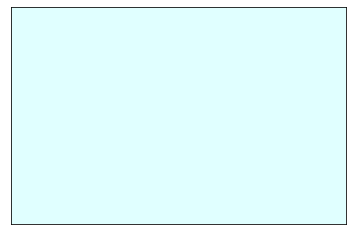

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

# Rectangle – для прямоугольника
# width, height – ширина и высота
# color – выставляем цвет фона

print("А теперь посмотрите, что вы выбрали...")

rect = plt.Rectangle(xy=(0,0), 
                    width=4, 
                    height=3, 
                    color=widget_opt.value)
plt.gca().add_patch(rect)
plt.xticks([])  # no ticks
plt.yticks([])  # no ticks
plt.show()

Кстати, есть уже готовый виджет для выбора цветов!

In [48]:
# после запуска кода появляется новое окно для выбора цвета из спектра
# выбираем цвет, закрываем, значение сохраняется (value)

widgets.ColorPicker(
    concise=False,
    description='Выберите цвет',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Выберите цвет')

### Пример с полем для ввода 

In [54]:
print("Введите ответ на следующий вопрос.")
print("Сколько черных чумазых чертят нужно, чтобы начертить черными чернилами чертеж?")

# value – значение по умолчанию (строка)
# placeholder – текст, который появляется в поле при удалении значения по умолчанию
# description –  текст рядом с полем

widget_num = widgets.Text(
    value='0',
    placeholder='Введите целое число: ',
    description='Ответ:',
    disabled=False
)

display(widget_num)

Введите ответ на следующий вопрос.
Сколько черных чумазых чертят нужно, чтобы начертить черными чернилами чертеж?


Text(value='0', description='Ответ:', placeholder='Введите целое число: ')

In [56]:
n = int(widget_num.value)
if n == 4:
    print("Да!")
else:
    print("У вас не было детства!")

Да!
